# 범주형 독립변수
## 더미 변수(dummy variable)
- treatment = indicator variable = disign variable = Boolean indicator = binary variable

### 1) 두 가지 범주
- a. 남/여 모델 2 개 만들어 따로 선형회귀
$$ 식 $$
    - 문제: 가중치가 각각 달라짐(남녀 둘에 동시에 영향 미치는 나이 등의 가중치도 달라짐)
    
    
- b. **reduced rank** 더미 변수 모형: 남여 변수 $x_1$을 (1,0) or (0, 1)로 바꿈
    - 상수: 남자모형, 여자모형
$$ 식 $$
    
    
    
- c. **full rank** 더미 변수 모형: 상수항은 다르지만, 기준 대비 얼만큼 +- 인지 확인
    - 상수: 남자 대비 여자 상수항 비교치 알 수 있음 
$$ 식 $$
    

연습

In [4]:
df1 = pd.DataFrame(data=["남", "여", "남", "여"], columns=["x1"])
df1

,x1
0,남
1,여
2,남
3,여


In [9]:
from patsy import *
# full rank
dmatrix("x1", df1)

DesignMatrix with shape (4, 2)
  Intercept  x1[T.여]
          1        0
          1        1
          1        0
          1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

In [10]:
#상수항 없애면 -> reduced
dmatrix("x1 + 0", df1)

DesignMatrix with shape (4, 2)
  x1[남]  x1[여]
      1      0
      0      1
      1      0
      0      1
  Terms:
    'x1' (columns 0:2)

### 2) 세 가지 범주
- 혈액형 A, B, AB, O
- full rank 
    - x = A $\rightarrow$ d=(1,0,0,0)
    - x = AB $\rightarrow$ d=(1,1,0,0)
    - x = B $\rightarrow$ d=(1,0,1,0)
    - x = O $\rightarrow$ d=(1,0,0,1)
- reduced rank(one-hot-encoding)
    - x = A $\rightarrow$ d=(1,0,0,0)
    - x = AB $\rightarrow$ d=(0,1,0,0)
    - x = B $\rightarrow$ d=(0,0,1,0)
    - x = O $\rightarrow$ d=(0,0,0,1)

연습

In [11]:
df = pd.DataFrame(["A", "B", "B", "AB", "O", "B", "AB"], columns=["x2"])
df

,x2
0,A
1,B
2,B
3,AB
4,O
5,B
6,AB


In [14]:
# full rank
dmatrix("x2", df)

DesignMatrix with shape (7, 4)
  Intercept  x2[T.AB]  x2[T.B]  x2[T.O]
          1         0        0        0
          1         0        1        0
          1         0        1        0
          1         1        0        0
          1         0        0        1
          1         0        1        0
          1         1        0        0
  Terms:
    'Intercept' (column 0)
    'x2' (columns 1:4)

In [15]:
#reduced rank
dmatrix("x2 +0", df)

DesignMatrix with shape (7, 4)
  x2[A]  x2[AB]  x2[B]  x2[O]
      1       0      0      0
      0       0      1      0
      0       0      1      0
      0       1      0      0
      0       0      0      1
      0       0      1      0
      0       1      0      0
  Terms:
    'x2' (columns 0:4)

### 3) 상호작용 있는 경우
- 범주형 변수값이 다른 독립 변수에 영향 미칠 때
- 즉, 범주형 x1에 따라 연속형 x2의 가중치가 달라질 때
- 질문: 위 식에서 w_2가 달라지는 경우인가?

#### 예시) 범주형 독립변수 회귀분석

In [4]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset("nottem").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
time     240 non-null float64
value    240 non-null float64
dtypes: float64(2)
memory usage: 3.8 KB


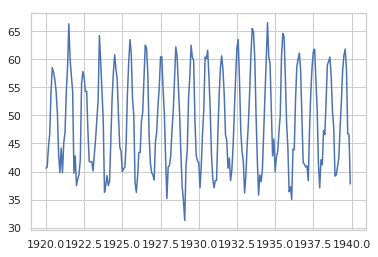

In [8]:
%matplotlib inline
plt.plot(df.time, df.value)
plt.show()